In [1]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
%matplotlib inline

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',
/local/data/anaconda3/envs/BT/lib/python3.11/site-pac

In [2]:
adata = anndata.read_h5ad(filename="data/adataLung4.h5ad")
scvi.model.SCVI.setup_anndata(adata, layer="counts")
adata

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


AnnData object with n_obs × n_vars = 32472 × 4000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [3]:
logger = TensorBoardLogger(save_dir="lightning_logs",name="Test")
def trainkEpochs(vae,k=5):
    vae.train(max_epochs=k,logger=logger)
    return vae

In [4]:
vaeSD = scvi.model.SCVI(adata)

In [5]:
vaeSD.train(max_epochs=2,logger=logger)
epoch = 2
vaeSD.save(f"models/test/{epoch}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 2/2: 100%|██████████| 2/2 [00:03<00:00,  1.66s/it, v_num=1, train_loss_step=1e+3, train_loss_epoch=991]       

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 2/2: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it, v_num=1, train_loss_step=1e+3, train_loss_epoch=991]


In [42]:
scvi.model.SCVI.load(f"models/test/{epoch}",adata=adata).train(max_epochs=2,logger=logger)
epoch = 4
vaeSD.save(f"models/test/{epoch}")

INFO     File models/test/2/model.pt already downloaded                                                            


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 2/2: 100%|██████████| 2/2 [00:38<00:00, 19.55s/it, v_num=0, train_loss_step=1.02e+3, train_loss_epoch=1.04e+3]

`Trainer.fit` stopped: `max_epochs=2` reached.


Epoch 2/2: 100%|██████████| 2/2 [00:38<00:00, 19.38s/it, v_num=0, train_loss_step=1.02e+3, train_loss_epoch=1.04e+3]


In [16]:
vaeSD = trainkEpochs(vaeSD)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 5/5: 100%|██████████| 5/5 [01:42<00:00, 20.89s/it, v_num=1, train_loss_step=1.13e+3, train_loss_epoch=1.03e+3]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [01:42<00:00, 20.51s/it, v_num=1, train_loss_step=1.13e+3, train_loss_epoch=1.03e+3]


In [17]:
vaeSD = trainkEpochs(vaeSD)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 5/5: 100%|██████████| 5/5 [01:42<00:00, 20.52s/it, v_num=1, train_loss_step=952, train_loss_epoch=998]        

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 5/5: 100%|██████████| 5/5 [01:42<00:00, 20.48s/it, v_num=1, train_loss_step=952, train_loss_epoch=998]


In [54]:
from lightning.pytorch.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(dirpath= "models/test/",save_last=True,filename="{epoch:02d}",every_n_epochs=10)
vaeSD.train(default_root_dir="models/test/",enable_checkpointing = True,  max_epochs = 20, callbacks=[checkpoint_callback])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 18/20:  85%|████████▌ | 17/20 [04:57<00:52, 17.41s/it, v_num=1, train_loss_step=1.01e+3, train_loss_epoch=958]

[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument


In [23]:
vaeSD.save("models/test/model")

In [25]:
vaeSD.Trainer

type: 'SCVI' object has no attribute 'Trainer'

In [20]:
checkpoint_callback.best_model_path

''

In [ ]:
checkpoint_callback.file_exists(filepath, trainer)

In [ ]:
vaeSD = scvi.model.SCVI(adata)

In [3]:
for i in range(10):
    vaeSD = scvi.model.SCVI(adata)
    vaeSD.train(max_epochs=i*20)
    vaeSD.save(f"models/test/epochs{10*i}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=0` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it, v_num=1, train_loss_step=765, train_loss_epoch=898]      

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it, v_num=1, train_loss_step=765, train_loss_epoch=898]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 40/40: 100%|██████████| 40/40 [01:03<00:00,  1.61s/it, v_num=1, train_loss_step=937, train_loss_epoch=889]      

`Trainer.fit` stopped: `max_epochs=40` reached.


Epoch 40/40: 100%|██████████| 40/40 [01:03<00:00,  1.59s/it, v_num=1, train_loss_step=937, train_loss_epoch=889]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 60/60: 100%|██████████| 60/60 [01:34<00:00,  1.60s/it, v_num=1, train_loss_step=888, train_loss_epoch=889]      

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 60/60: 100%|██████████| 60/60 [01:34<00:00,  1.57s/it, v_num=1, train_loss_step=888, train_loss_epoch=889]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 80/80: 100%|██████████| 80/80 [02:08<00:00,  1.62s/it, v_num=1, train_loss_step=970, train_loss_epoch=892]    

`Trainer.fit` stopped: `max_epochs=80` reached.


Epoch 80/80: 100%|██████████| 80/80 [02:08<00:00,  1.61s/it, v_num=1, train_loss_step=970, train_loss_epoch=892]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 100/100: 100%|██████████| 100/100 [02:40<00:00,  1.57s/it, v_num=1, train_loss_step=815, train_loss_epoch=892]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [02:40<00:00,  1.61s/it, v_num=1, train_loss_step=815, train_loss_epoch=892]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 120/120: 100%|██████████| 120/120 [03:09<00:00,  1.70s/it, v_num=1, train_loss_step=881, train_loss_epoch=892]    

`Trainer.fit` stopped: `max_epochs=120` reached.


Epoch 120/120: 100%|██████████| 120/120 [03:09<00:00,  1.58s/it, v_num=1, train_loss_step=881, train_loss_epoch=892]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 140/140: 100%|██████████| 140/140 [03:45<00:00,  1.55s/it, v_num=1, train_loss_step=949, train_loss_epoch=891]    

`Trainer.fit` stopped: `max_epochs=140` reached.


Epoch 140/140: 100%|██████████| 140/140 [03:45<00:00,  1.61s/it, v_num=1, train_loss_step=949, train_loss_epoch=891]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 160/160: 100%|██████████| 160/160 [04:09<00:00,  1.60s/it, v_num=1, train_loss_step=903, train_loss_epoch=890]    

`Trainer.fit` stopped: `max_epochs=160` reached.


Epoch 160/160: 100%|██████████| 160/160 [04:09<00:00,  1.56s/it, v_num=1, train_loss_step=903, train_loss_epoch=890]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Epoch 180/180: 100%|██████████| 180/180 [04:44<00:00,  1.57s/it, v_num=1, train_loss_step=872, train_loss_epoch=891]    

`Trainer.fit` stopped: `max_epochs=180` reached.


Epoch 180/180: 100%|██████████| 180/180 [04:44<00:00,  1.58s/it, v_num=1, train_loss_step=872, train_loss_epoch=891]


In [11]:
def getBenchmarkResultsEpochs(adata,dir,prior):
    benchmark_results = []
    for i in range(10):
        vae = scvi.model.SCVI.load(f"{dir}{prior}{10*i}",adata = adata)
        adatac = adata.copy()
        adatac.obsm["scVI"] = vae.get_latent_representation()
        bm = Benchmarker(
            adatac,
            batch_key="batch",
            label_key="cell_type",
            embedding_obsm_keys=["scVI"],
            bio_conservation_metrics=scib_metrics.benchmark.BioConservation(isolated_labels=False, nmi_ari_cluster_labels_leiden=True, nmi_ari_cluster_labels_kmeans=True, silhouette_label=False, clisi_knn=False),
            batch_correction_metrics=scib_metrics.benchmark.BatchCorrection(silhouette_batch=False, ilisi_knn=False, kbet_per_label=True, graph_connectivity=False, pcr_comparison=False),
            n_jobs=6
        )
        bm.benchmark()
        benchmark_results.append(bm.get_results(min_max_scale=False))
    return benchmark_results

INFO     File models/test/epochs0/model.pt already downloaded                                                      


Embeddings: 100%|██████████| 1/1 [00:30<00:00, 30.16s/it]


INFO     File models/test/epochs10/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:26<00:00, 26.15s/it]


INFO     File models/test/epochs20/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:24<00:00, 24.32s/it]


INFO     File models/test/epochs30/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:23<00:00, 23.35s/it]


INFO     File models/test/epochs40/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:21<00:00, 21.02s/it]


INFO     File models/test/epochs50/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:22<00:00, 22.47s/it]


INFO     File models/test/epochs60/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:23<00:00, 23.04s/it]


INFO     File models/test/epochs70/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:21<00:00, 21.94s/it]


INFO     File models/test/epochs80/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:22<00:00, 22.33s/it]


INFO     File models/test/epochs90/model.pt already downloaded                                                     


Embeddings: 100%|██████████| 1/1 [00:22<00:00, 22.13s/it]


In [ ]:
benchmark_results = getBenchmarkResultsEpochs(adata, "models/test/", "epoch")

In [14]:
benchmark_results[0]

,Leiden NMI,Leiden ARI,KMeans NMI,KMeans ARI,KBET,Batch correction,Bio conservation,Total
Embedding,,,,,,,,
scVI,0.241694,0.179938,0.213779,0.124018,0.495664,0.495664,0.189857,0.31218
Metric Type,Bio conservation,Bio conservation,Bio conservation,Bio conservation,Batch correction,Aggregate score,Aggregate score,Aggregate score


In [16]:
benchmark_results[0]["Leiden NMI"]["scVI"]

0.49566432414804745

In [18]:
kbets = []
leidens = []
kmeans = []
for i in range(10):
    kbets.append(benchmark_results[i]["KBET"]["scVI"])
    leidens.append(benchmark_results[i]["Leiden NMI"]["scVI"])
    kmeans.append(benchmark_results[i]["KMeans NMI"]["scVI"])

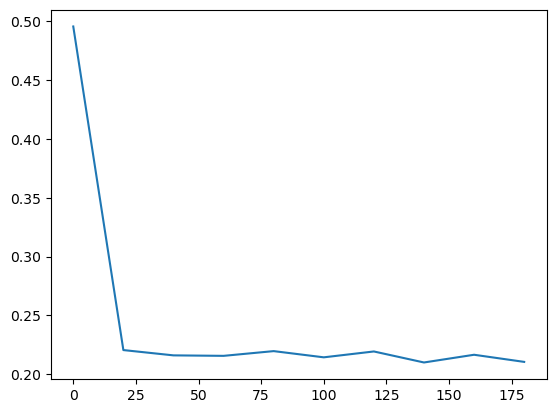

In [20]:
plt.plot(np.linspace(0,180,10),kbets)

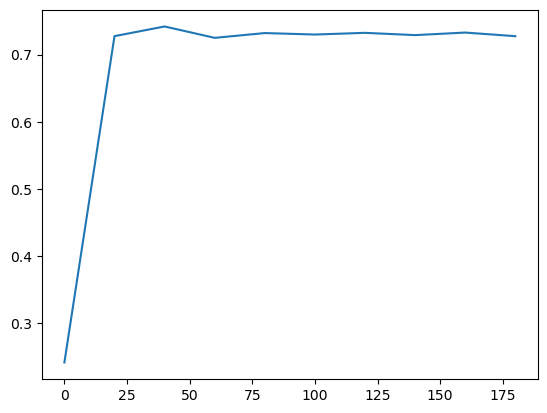

In [21]:
plt.plot(np.linspace(0,180,10),leidens)

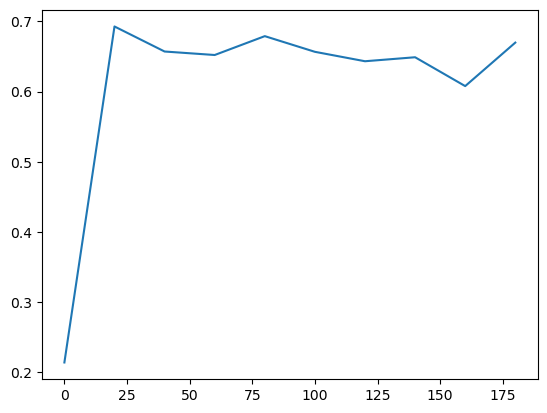

In [22]:
plt.plot(np.linspace(0,180,10),kmeans)

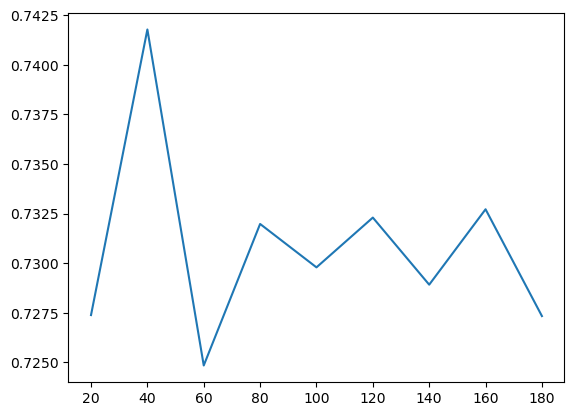

In [27]:
plt.plot(np.linspace(20,180,9),leidens[1:])